## EDA_tablet_orders

* 2022.11.01 ~ 2022.12.01 간, 태블릿 주문 플랫폼 기업의 주문 정보 데이터를 활용한 EDA 작업을 수행했습니다.
* 고정된 하루 영업일 기준 - 07:00분 영업 시작 ~ 다음 날 06:59분

In [2]:
# 라이브러리 및 데이터프레임 import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

o = pd.read_csv('orders.csv')
oc = pd.read_csv('order_contents_information.csv')

In [3]:
# 주문 테이블
o

,id,store_code,time_order,is_paid_order,is_first_order,is_error_exists
0,1,store_0,2022-11-01 07:09:00,False,True,False
1,2,store_1,2022-11-01 07:12:00,False,True,False
2,3,store_2,2022-11-01 07:19:00,False,True,False
3,4,store_3,2022-11-01 07:28:00,False,False,False
4,5,store_4,2022-11-01 07:36:00,False,True,False
...,...,...,...,...,...,...
380746,380747,store_21,2022-12-01 06:26:00,False,True,False
380747,380748,store_34,2022-12-01 06:44:00,False,False,False
380748,380749,store_14,2022-12-01 06:47:00,False,True,False
380749,380750,store_1416,2022-12-01 06:57:00,False,False,False


In [4]:
o.info()
# 총 380751 행, 결측치 없음.

# id(주문 id)
# store_code(가게 코드)
# 주문 시간
# is_paid_order(선결제 여부)
# is_first_order(첫 주문인지 여부)
# is_error_exists(오류 발생 여부)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380751 entries, 0 to 380750
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               380751 non-null  int64 
 1   store_code       380751 non-null  object
 2   time_order       380751 non-null  object
 3   is_paid_order    380751 non-null  bool  
 4   is_first_order   380751 non-null  bool  
 5   is_error_exists  380751 non-null  bool  
dtypes: bool(3), int64(1), object(2)
memory usage: 9.8+ MB


In [3]:
# 주문 상세 내역 테이블
oc

,order_id,price,quantity,good_code,good_category
0,1,10000.0,1,0,식사류
1,2,10000.0,1,1,순대국밥
2,3,9000.0,1,2,순대국밥
3,4,15900.0,1,3,고기류
4,4,3900.0,1,4,메뉴숨기기
...,...,...,...,...,...
622460,380747,19500.0,1,32,NaN
622461,380748,4000.0,1,32,NaN
622462,380749,3500.0,1,552,라면류
622463,380750,2000.0,1,6280,음료


In [5]:
oc.info()
# 총 622465 행, 상품 품목 컬럼에 결측치 존재

# order_id(주문 id)
# price(가격)
# quantity(양)
# good_code(상품 코드)
# good_category(상품 품목)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622465 entries, 0 to 622464
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       622465 non-null  int64  
 1   price          622272 non-null  float64
 2   quantity       622465 non-null  int64  
 3   good_code      622465 non-null  int64  
 4   good_category  517064 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 23.7+ MB


In [5]:
# 두 개의 테이블 inner join(id = order_id)

df = pd.merge(oc, o, left_on = 'order_id', right_on = 'id', how = 'inner')
df

,order_id,price,quantity,good_code,good_category,id,store_code,time_order,is_paid_order,is_first_order,is_error_exists
0,1,10000.0,1,0,식사류,1,store_0,2022-11-01 07:09:00,False,True,False
1,2,10000.0,1,1,순대국밥,2,store_1,2022-11-01 07:12:00,False,True,False
2,3,9000.0,1,2,순대국밥,3,store_2,2022-11-01 07:19:00,False,True,False
3,4,15900.0,1,3,고기류,4,store_3,2022-11-01 07:28:00,False,False,False
4,4,3900.0,1,4,메뉴숨기기,4,store_3,2022-11-01 07:28:00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
622460,380747,19500.0,1,32,NaN,380747,store_21,2022-12-01 06:26:00,False,True,False
622461,380748,4000.0,1,32,NaN,380748,store_34,2022-12-01 06:44:00,False,False,False
622462,380749,3500.0,1,552,라면류,380749,store_14,2022-12-01 06:47:00,False,True,False
622463,380750,2000.0,1,6280,음료,380750,store_1416,2022-12-01 06:57:00,False,False,False


In [6]:
# 테이블 join 이후, 분석에 불필요한 변수 제거

df.drop(['order_id', 'id'], axis = 1, inplace = True)
df

,price,quantity,good_code,good_category,store_code,time_order,is_paid_order,is_first_order,is_error_exists
0,10000.0,1,0,식사류,store_0,2022-11-01 07:09:00,False,True,False
1,10000.0,1,1,순대국밥,store_1,2022-11-01 07:12:00,False,True,False
2,9000.0,1,2,순대국밥,store_2,2022-11-01 07:19:00,False,True,False
3,15900.0,1,3,고기류,store_3,2022-11-01 07:28:00,False,False,False
4,3900.0,1,4,메뉴숨기기,store_3,2022-11-01 07:28:00,False,False,False
...,...,...,...,...,...,...,...,...,...
622460,19500.0,1,32,NaN,store_21,2022-12-01 06:26:00,False,True,False
622461,4000.0,1,32,NaN,store_34,2022-12-01 06:44:00,False,False,False
622462,3500.0,1,552,라면류,store_14,2022-12-01 06:47:00,False,True,False
622463,2000.0,1,6280,음료,store_1416,2022-12-01 06:57:00,False,False,False


In [7]:
# pandas datetime 모듈 처리

df['time_order'] = pd.to_datetime(df['time_order'])

In [8]:
# 영업일 기준 하루 slicing

df[(df.time_order >= '2022-11-01 07:00')&(df.time_order <= '2022-11-02 06:59')]

,price,quantity,good_code,good_category,store_code,time_order,is_paid_order,is_first_order,is_error_exists
0,10000.0,1,0,식사류,store_0,2022-11-01 07:09:00,False,True,False
1,10000.0,1,1,순대국밥,store_1,2022-11-01 07:12:00,False,True,False
2,9000.0,1,2,순대국밥,store_2,2022-11-01 07:19:00,False,True,False
3,15900.0,1,3,고기류,store_3,2022-11-01 07:28:00,False,False,False
4,3900.0,1,4,메뉴숨기기,store_3,2022-11-01 07:28:00,False,False,False
...,...,...,...,...,...,...,...,...,...
15862,5900.0,1,3623,구도로떡볶이,store_1416,2022-11-02 06:41:00,False,True,False
15863,5900.0,1,1572,일반 사이드 : 고기류 주문시에 추가 주문 가능,store_3,2022-11-02 06:43:00,False,False,False
15864,6000.0,1,4828,소주,store_103,2022-11-02 06:48:00,False,True,False
15865,0.0,1,6500,직원호출 메뉴,store_18,2022-11-02 06:57:00,False,False,False


In [9]:
# 영업일 기준 일별 데이터프레임 재구성


# Day 1 ~ Day 10

d1 = df[(df.time_order >= '2022-11-01 07:00')&(df.time_order <= '2022-11-02 06:59')]
d2 = df[(df.time_order >= '2022-11-02 07:00')&(df.time_order <= '2022-11-03 06:59')]
d3 = df[(df.time_order >= '2022-11-03 07:00')&(df.time_order <= '2022-11-04 06:59')]
d4 = df[(df.time_order >= '2022-11-04 07:00')&(df.time_order <= '2022-11-05 06:59')]
d5 = df[(df.time_order >= '2022-11-05 07:00')&(df.time_order <= '2022-11-06 06:59')]

d6 = df[(df.time_order >= '2022-11-06 07:00')&(df.time_order <= '2022-11-07 06:59')]
d7 = df[(df.time_order >= '2022-11-07 07:00')&(df.time_order <= '2022-11-08 06:59')]
d8 = df[(df.time_order >= '2022-11-08 07:00')&(df.time_order <= '2022-11-09 06:59')]
d9 = df[(df.time_order >= '2022-11-09 07:00')&(df.time_order <= '2022-11-10 06:59')]
d10 = df[(df.time_order >= '2022-11-10 07:00')&(df.time_order <= '2022-11-11 06:59')]

In [10]:
# Day 11 ~ Day 20

d11 = df[(df.time_order >= '2022-11-11 07:00')&(df.time_order <= '2022-11-12 06:59')]
d12 = df[(df.time_order >= '2022-11-12 07:00')&(df.time_order <= '2022-11-13 06:59')]
d13 = df[(df.time_order >= '2022-11-13 07:00')&(df.time_order <= '2022-11-14 06:59')]
d14 = df[(df.time_order >= '2022-11-14 07:00')&(df.time_order <= '2022-11-15 06:59')]
d15 = df[(df.time_order >= '2022-11-15 07:00')&(df.time_order <= '2022-11-16 06:59')]

d16 = df[(df.time_order >= '2022-11-16 07:00')&(df.time_order <= '2022-11-17 06:59')]
d17 = df[(df.time_order >= '2022-11-17 07:00')&(df.time_order <= '2022-11-18 06:59')]
d18 = df[(df.time_order >= '2022-11-18 07:00')&(df.time_order <= '2022-11-19 06:59')]
d19 = df[(df.time_order >= '2022-11-19 07:00')&(df.time_order <= '2022-11-20 06:59')]
d20 = df[(df.time_order >= '2022-11-20 07:00')&(df.time_order <= '2022-11-21 06:59')]

In [11]:
# Day 21 ~ Day 30

d21 = df[(df.time_order >= '2022-11-21 07:00')&(df.time_order <= '2022-11-22 06:59')]
d22 = df[(df.time_order >= '2022-11-22 07:00')&(df.time_order <= '2022-11-23 06:59')]
d23 = df[(df.time_order >= '2022-11-23 07:00')&(df.time_order <= '2022-11-24 06:59')]
d24 = df[(df.time_order >= '2022-11-24 07:00')&(df.time_order <= '2022-11-25 06:59')]
d25 = df[(df.time_order >= '2022-11-25 07:00')&(df.time_order <= '2022-11-26 06:59')]

d26 = df[(df.time_order >= '2022-11-26 07:00')&(df.time_order <= '2022-11-27 06:59')]
d27 = df[(df.time_order >= '2022-11-27 07:00')&(df.time_order <= '2022-11-28 06:59')]
d28 = df[(df.time_order >= '2022-11-28 07:00')&(df.time_order <= '2022-11-29 06:59')]
d29 = df[(df.time_order >= '2022-11-29 07:00')&(df.time_order <= '2022-11-30 06:59')]
d30 = df[(df.time_order >= '2022-11-30 07:00')&(df.time_order <= '2022-12-01 06:59')]

In [12]:
# 일별 태블릿 주문 이용량 및 에러율 확인을 위한 데이터프레임 재구성


q1 = pd.DataFrame({'day':[i for i in range(1, 31)],\
                  'cnt': [len(d1),len(d2),len(d3),len(d4),len(d5),\
                         len(d6),len(d7),len(d8),len(d9),len(d10),\
                         len(d11),len(d12),len(d13),len(d14),len(d15),\
                         len(d16),len(d17),len(d18),len(d19),len(d20),\
                         len(d21),len(d22),len(d23),len(d24),len(d25),\
                         len(d26),len(d27),len(d28),len(d29),len(d30)],\
                  'error': [d1.is_error_exists.mean(),\
                           d2.is_error_exists.mean(),\
                           d3.is_error_exists.mean(),\
                           d4.is_error_exists.mean(),\
                           d5.is_error_exists.mean(),\
                           d6.is_error_exists.mean(),\
                           d7.is_error_exists.mean(),\
                           d8.is_error_exists.mean(),\
                           d9.is_error_exists.mean(),\
                           d10.is_error_exists.mean(),\
                           d11.is_error_exists.mean(),\
                           d12.is_error_exists.mean(),\
                           d13.is_error_exists.mean(),\
                           d14.is_error_exists.mean(),\
                           d15.is_error_exists.mean(),\
                           d16.is_error_exists.mean(),\
                           d17.is_error_exists.mean(),\
                           d18.is_error_exists.mean(),\
                           d19.is_error_exists.mean(),\
                           d20.is_error_exists.mean(),\
                           d21.is_error_exists.mean(),\
                           d22.is_error_exists.mean(),\
                           d23.is_error_exists.mean(),\
                           d24.is_error_exists.mean(),\
                           d25.is_error_exists.mean(),\
                           d26.is_error_exists.mean(),\
                           d27.is_error_exists.mean(),\
                           d28.is_error_exists.mean(),\
                           d29.is_error_exists.mean(),\
                           d30.is_error_exists.mean()]})

q1.head()

,day,cnt,error
0,1,15867,0.001008
1,2,16329,0.000551
2,3,17349,0.000461
3,4,25563,0.000587
4,5,31508,0.000413


In [13]:
# 일별 에러율 최댓값

q1.error.max()

0.0010910724600474938

In [14]:
# 일별 에러율 최솟값

q1.error.min()

0.0002772130844575864

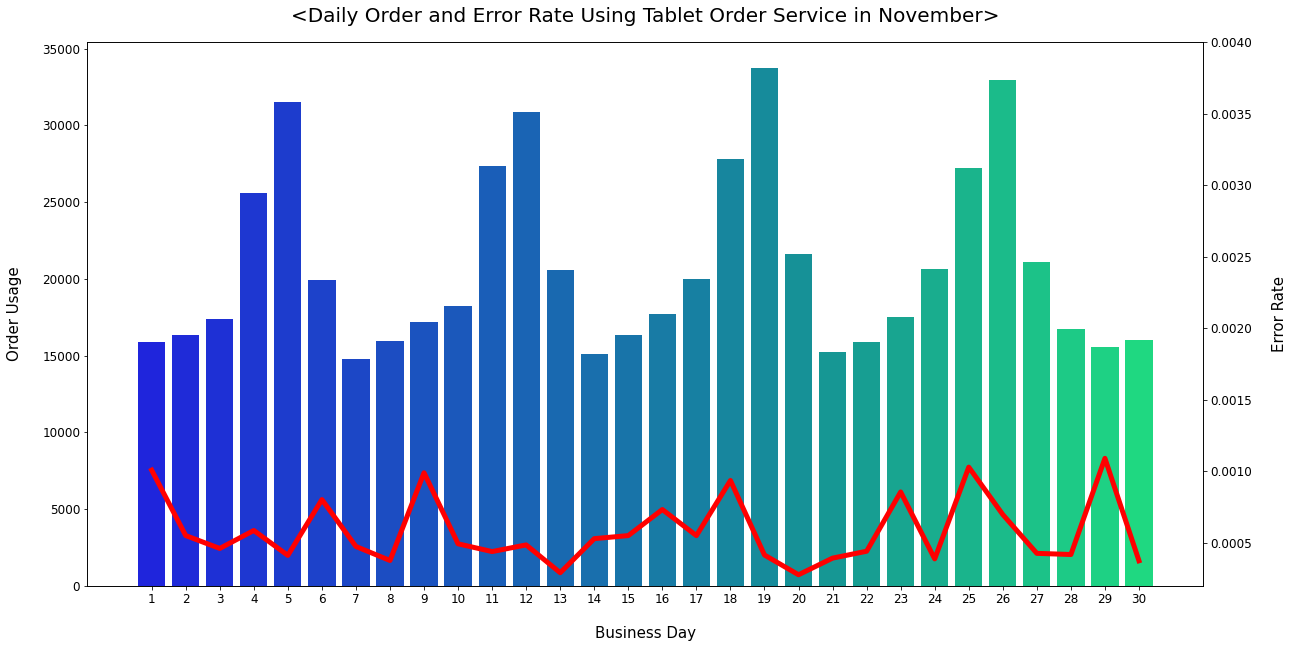

In [15]:
# 시각화

fig = plt.figure(figsize=(20, 10))  
ax1 = fig.add_subplot()

sns.barplot(x = q1['day'].values, y = q1['cnt'].values, palette = 'winter')
ax1.set_xlabel('Business Day', fontsize = 15, labelpad = 20)
ax1.set_ylabel('Order Usage', fontsize = 15, labelpad = 20)
ax1.tick_params(axis = 'x', labelsize = 12)
ax1.tick_params(axis = 'y', labelsize = 12)

ax2 = ax1.twinx()
sns.lineplot(x = q1['day'].index, y = q1['error'].values, color = 'r', linewidth = '5')
ax2.set_ylabel('Error Rate', fontsize = 15, labelpad = 20)
ax2.tick_params(axis = 'y', labelsize = 12)
ax2.set_ylim([0.0002, 0.004])
# 일별 에러율의 최댓값 및 최솟값 참고

plt.title('<Daily Order and Error Rate Using Tablet Order Service in November>', fontsize = 20, pad = 20)
plt.show()

###### 위 그래프를 통해, 태블릿 주문량이 요일이 지날수록 점차 증가를 보이다가
###### 금요일에 주문량이 현저히 높아지고
###### 토요일에 태블릿 주문량이 최고점에 도달하면서, 일요일부터 다시 감소하는 패턴을 보입니다.  
###### 11.4(금) 11.5(토)  
##### 11.11(금) 11.12(토)
##### 11.18(금) 11.19(토)
##### 11.25(금) 11.26(토) 


In [41]:
# 영업일 별 태블릿 주문 메뉴 품목 비중 top 10(2022.11.01 ~ 2022.11.30)
# 여러 종류의 술은 '주류 합계' 품목으로 취합


# day 1 ~ day 10(영업일 기준)

cat1 = d1.good_category.value_counts()[:10].to_frame()
cat1.loc['주류 합계'] = cat1[cat1.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat1.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat2 = d2.good_category.value_counts()[:10].to_frame()
cat2.loc['주류 합계'] = cat2[cat2.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat2.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat3 = d3.good_category.value_counts()[:10].to_frame()
cat3.loc['주류 합계'] = cat3[cat3.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat3.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat4 = d4.good_category.value_counts()[:10].to_frame()
cat4.loc['주류 합계'] = cat4[cat4.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat4.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat5 = d5.good_category.value_counts()[:10].to_frame()
cat5.loc['주류 합계'] = cat5[cat5.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat5.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat6 = d6.good_category.value_counts()[:10].to_frame()
cat6.loc['주류 합계'] = cat6[cat6.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat6.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat7 = d7.good_category.value_counts()[:10].to_frame()
cat7.loc['주류 합계'] = cat7[cat7.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat7.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat8 = d8.good_category.value_counts()[:10].to_frame()
cat8.loc['주류 합계'] = cat8[cat8.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat8.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat9 = d9.good_category.value_counts()[:10].to_frame()
cat9.loc['주류 합계'] = cat9[cat9.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat9.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat10 = d10.good_category.value_counts()[:10].to_frame()
cat10.loc['주류 합계'] = cat10[cat10.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat10.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

In [42]:
# day 11 ~ day 20(영업일 기준)

cat11 = d11.good_category.value_counts()[:10].to_frame()
cat11.loc['주류 합계'] = cat11[cat11.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat11.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat12 = d12.good_category.value_counts()[:10].to_frame()
cat12.loc['주류 합계'] = cat12[cat12.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat12.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat13 = d13.good_category.value_counts()[:10].to_frame()
cat13.loc['주류 합계'] = cat13[cat13.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat13.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat14 = d14.good_category.value_counts()[:10].to_frame()
cat14.loc['주류 합계'] = cat14[cat14.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat14.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat15 = d15.good_category.value_counts()[:10].to_frame()
cat15.loc['주류 합계'] = cat15[cat15.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat15.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat16 = d16.good_category.value_counts()[:10].to_frame()
cat16.loc['주류 합계'] = cat16[cat16.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat16.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat17 = d17.good_category.value_counts()[:10].to_frame()
cat17.loc['주류 합계'] = cat17[cat17.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat17.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat18 = d18.good_category.value_counts()[:10].to_frame()
cat18.loc['주류 합계'] = cat18[cat18.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat18.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat19 = d19.good_category.value_counts()[:10].to_frame()
cat19.loc['주류 합계'] = cat19[cat19.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat19.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat20 = d20.good_category.value_counts()[:10].to_frame()
cat20.loc['주류 합계'] = cat20[cat20.index.str.contains('소주|맥주|주류')].sum().values[0]
cat20.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

In [43]:
# day 21 ~ day 30(영업일 기준)

cat21 = d21.good_category.value_counts()[:10].to_frame()
cat21.loc['주류 합계'] = cat21[cat21.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat21.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat22 = d22.good_category.value_counts()[:10].to_frame()
cat22.loc['주류 합계'] = cat22[cat22.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat22.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat23 = d23.good_category.value_counts()[:10].to_frame()
cat23.loc['주류 합계'] = cat23[cat23.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat23.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat24 = d24.good_category.value_counts()[:10].to_frame()
cat24.loc['주류 합계'] = cat24[cat24.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat24.drop(['소주','맥주','주류','생맥주&병맥주','소주&맥주'], inplace = True)

cat25 = d25.good_category.value_counts()[:10].to_frame()
cat25.loc['주류 합계'] = cat25[cat25.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat25.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat26 = d26.good_category.value_counts()[:11].to_frame()
# 상위 10번 째와 11번째 항목 count 가 동수이므로, [:11] 로 설정했습니다.
cat26.loc['주류 합계'] = cat26[cat26.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat26.drop(['소주','맥주','주류','생맥주&병맥주','소주&맥주'], inplace = True)

cat27 = d27.good_category.value_counts()[:10].to_frame()
cat27.loc['주류 합계'] = cat27[cat27.index.str.contains('소주|맥주|주류')].sum().values[0]
cat27.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

cat28 = d28.good_category.value_counts()[:10].to_frame()
cat28.loc['주류 합계'] = cat28[cat28.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat28.drop(['소주','맥주','주류','생맥주&병맥주','소주&맥주'], inplace = True)

cat29 = d29.good_category.value_counts()[:10].to_frame()
cat29.loc['주류 합계'] = cat29[cat29.index.str.contains('소주|맥주|주류')].drop('안주류').sum().values[0]
cat29.drop(['소주','맥주','주류'], inplace = True)

cat30 = d30.good_category.value_counts()[:10].to_frame()
cat30.loc['주류 합계'] = cat30[cat30.index.str.contains('소주|맥주|주류')].sum().values[0]
cat30.drop(['소주','맥주','주류','생맥주&병맥주'], inplace = True)

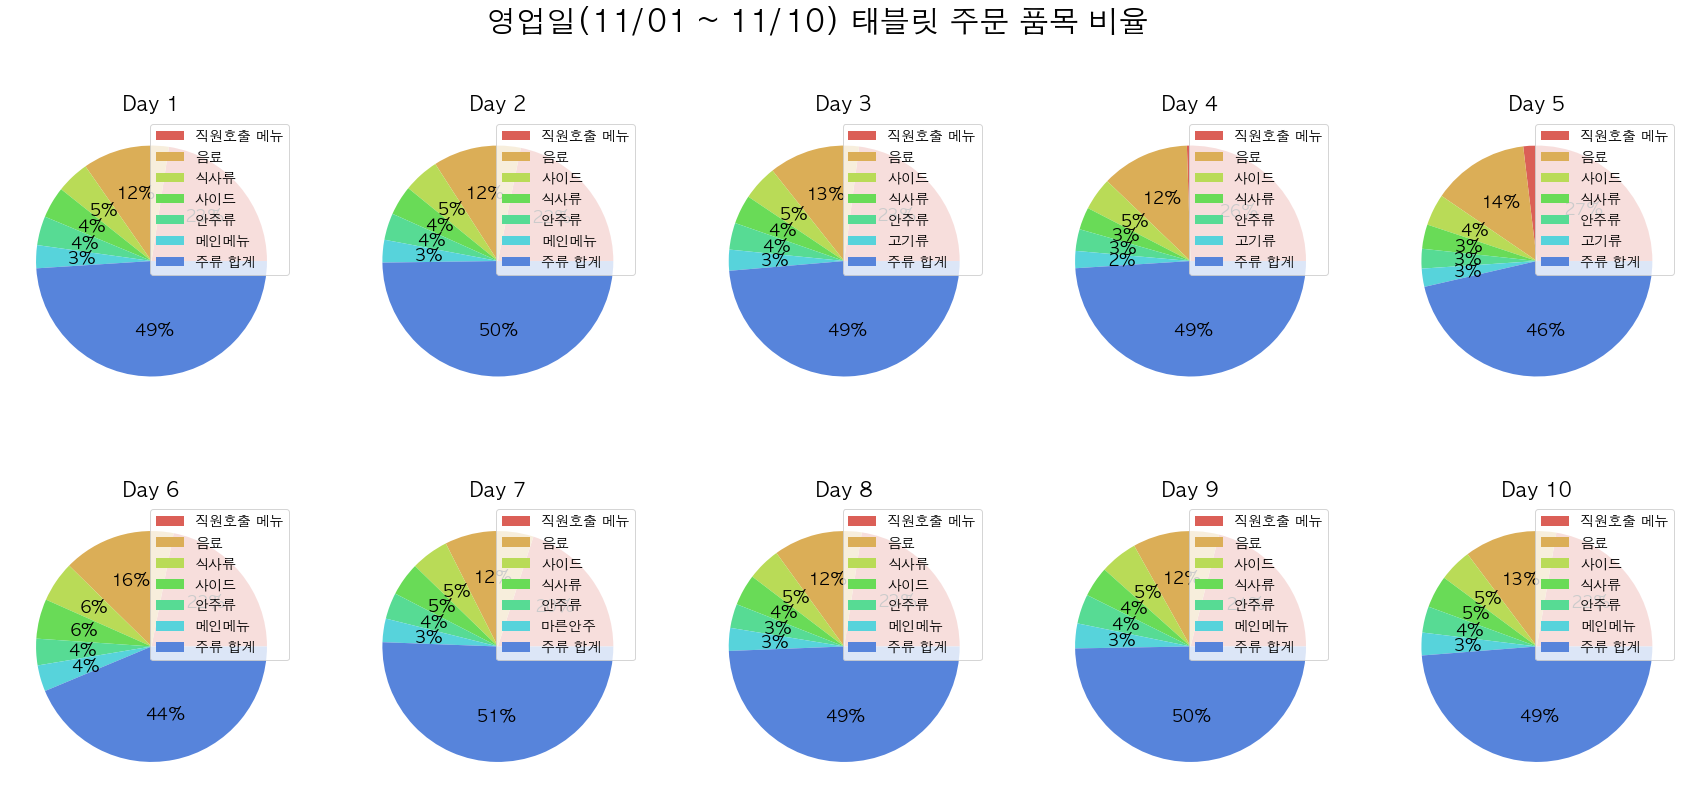

In [44]:
# day 1 ~ day 10(영업일 기준) 일별 주문 항목 비율 


fig, ax = plt.subplots(2, 5, figsize = (30, 13))

ax[0,0].pie(cat1.good_category.values, autopct = '%1.0f%%')
ax[0,0].legend(cat1.index, fontsize = 14, loc = 1)
ax[0,0].set_title('Day 1', fontsize = 20)

ax[0,1].pie(cat2.good_category.values, autopct = '%1.0f%%')
ax[0,1].legend(cat2.index, fontsize = 14, loc = 1)
ax[0,1].set_title('Day 2', fontsize = 20)

ax[0,2].pie(cat3.good_category.values, autopct = '%1.0f%%')
ax[0,2].legend(cat3.index, fontsize = 14, loc = 1)
ax[0,2].set_title('Day 3', fontsize = 20)

ax[0,3].pie(cat4.good_category.values, autopct = '%1.0f%%')
ax[0,3].legend(cat4.index, fontsize = 14, loc = 1)
ax[0,3].set_title('Day 4', fontsize = 20)

ax[0,4].pie(cat5.good_category.values, autopct = '%1.0f%%')
ax[0,4].legend(cat5.index, fontsize = 14, loc = 1)
ax[0,4].set_title('Day 5', fontsize = 20)

ax[1,0].pie(cat6.good_category.values, autopct = '%1.0f%%')
ax[1,0].legend(cat6.index, fontsize = 14, loc = 1)
ax[1,0].set_title('Day 6', fontsize = 20)

ax[1,1].pie(cat7.good_category.values, autopct = '%1.0f%%')
ax[1,1].legend(cat7.index, fontsize = 14, loc = 1)
ax[1,1].set_title('Day 7', fontsize = 20)

ax[1,2].pie(cat8.good_category.values, autopct = '%1.0f%%')
ax[1,2].legend(cat8.index, fontsize = 14, loc = 1)
ax[1,2].set_title('Day 8', fontsize = 20)

ax[1,3].pie(cat9.good_category.values, autopct = '%1.0f%%')
ax[1,3].legend(cat9.index, fontsize = 14, loc = 1)
ax[1,3].set_title('Day 9', fontsize = 20)

ax[1,4].pie(cat10.good_category.values, autopct = '%1.0f%%')
ax[1,4].legend(cat10.index, fontsize = 14, loc = 1)
ax[1,4].set_title('Day 10', fontsize = 20)

plt.suptitle('영업일(11/01 ~ 11/10) 태블릿 주문 품목 비율', fontsize = 30)
plt.show()

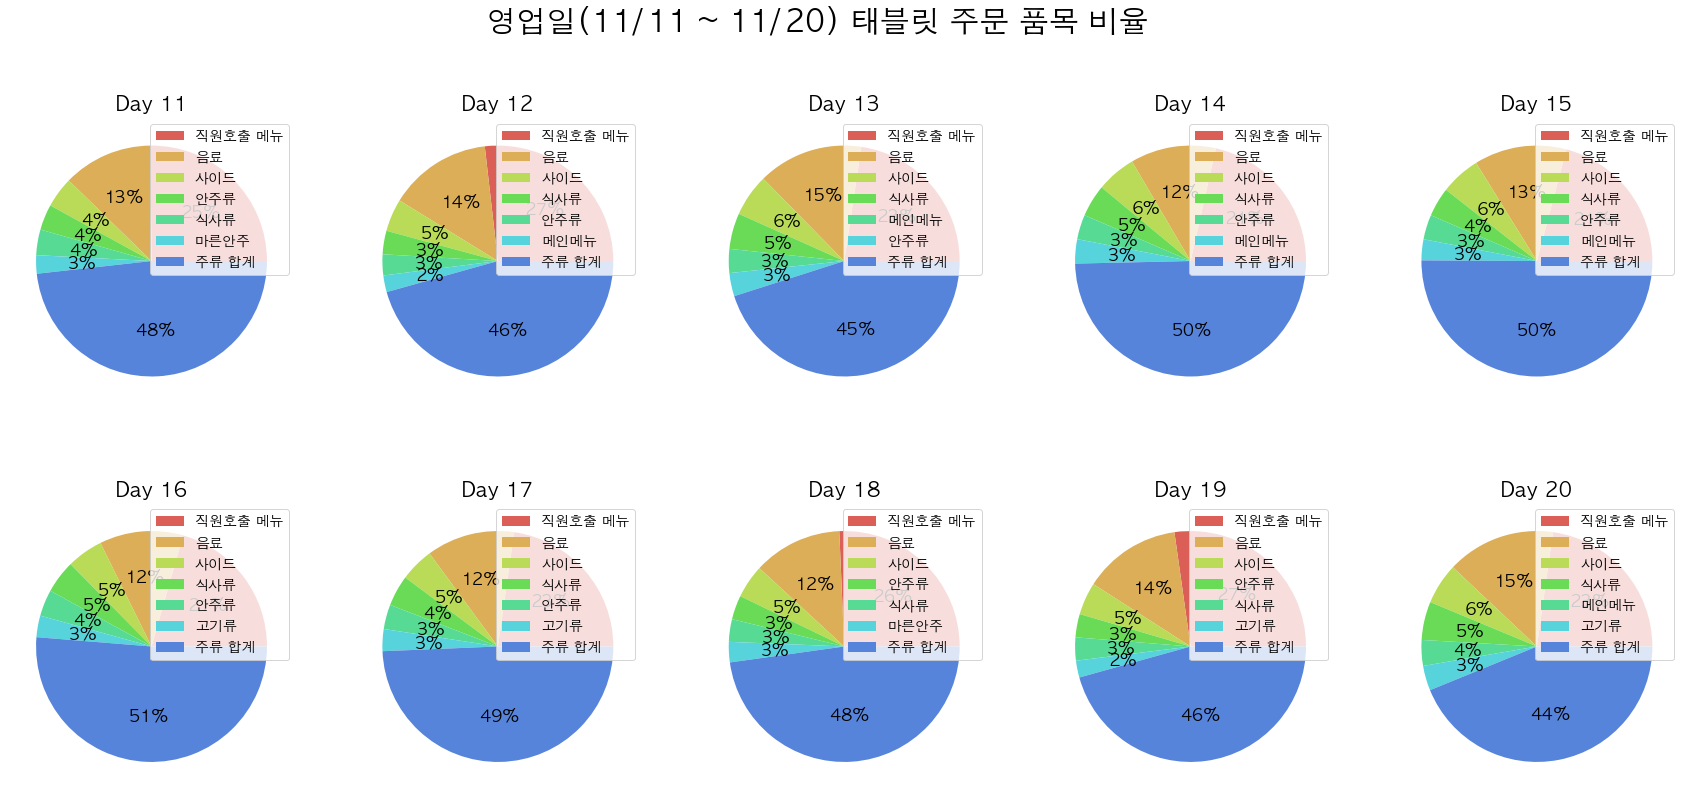

In [45]:
# day 11 ~ day 20 일별 주문 항목 비율

fig, ax = plt.subplots(2, 5, figsize = (30, 13))

ax[0,0].pie(cat11.good_category.values, autopct = '%1.0f%%')
ax[0,0].legend(cat11.index, fontsize = 14, loc = 1)
ax[0,0].set_title('Day 11')

ax[0,1].pie(cat12.good_category.values, autopct = '%1.0f%%')
ax[0,1].legend(cat12.index, fontsize = 14, loc = 1)
ax[0,1].set_title('Day 12')

ax[0,2].pie(cat13.good_category.values, autopct = '%1.0f%%')
ax[0,2].legend(cat13.index, fontsize = 14, loc = 1)
ax[0,2].set_title('Day 13')

ax[0,3].pie(cat14.good_category.values, autopct = '%1.0f%%')
ax[0,3].legend(cat14.index, fontsize = 14, loc = 1)
ax[0,3].set_title('Day 14')

ax[0,4].pie(cat15.good_category.values, autopct = '%1.0f%%')
ax[0,4].legend(cat15.index, fontsize = 14, loc = 1)
ax[0,4].set_title('Day 15')

ax[1,0].pie(cat16.good_category.values, autopct = '%1.0f%%')
ax[1,0].legend(cat16.index, fontsize = 14, loc = 1)
ax[1,0].set_title('Day 16')

ax[1,1].pie(cat17.good_category.values, autopct = '%1.0f%%')
ax[1,1].legend(cat17.index, fontsize = 14, loc = 1)
ax[1,1].set_title('Day 17')

ax[1,2].pie(cat18.good_category.values, autopct = '%1.0f%%')
ax[1,2].legend(cat18.index, fontsize = 14, loc = 1)
ax[1,2].set_title('Day 18')

ax[1,3].pie(cat19.good_category.values, autopct = '%1.0f%%')
ax[1,3].legend(cat19.index, fontsize = 14, loc = 1)
ax[1,3].set_title('Day 19')

ax[1,4].pie(cat20.good_category.values, autopct = '%1.0f%%')
ax[1,4].legend(cat20.index, fontsize = 14, loc = 1)
ax[1,4].set_title('Day 20')

plt.suptitle('영업일(11/11 ~ 11/20) 태블릿 주문 품목 비율', fontsize = 30)
plt.show()

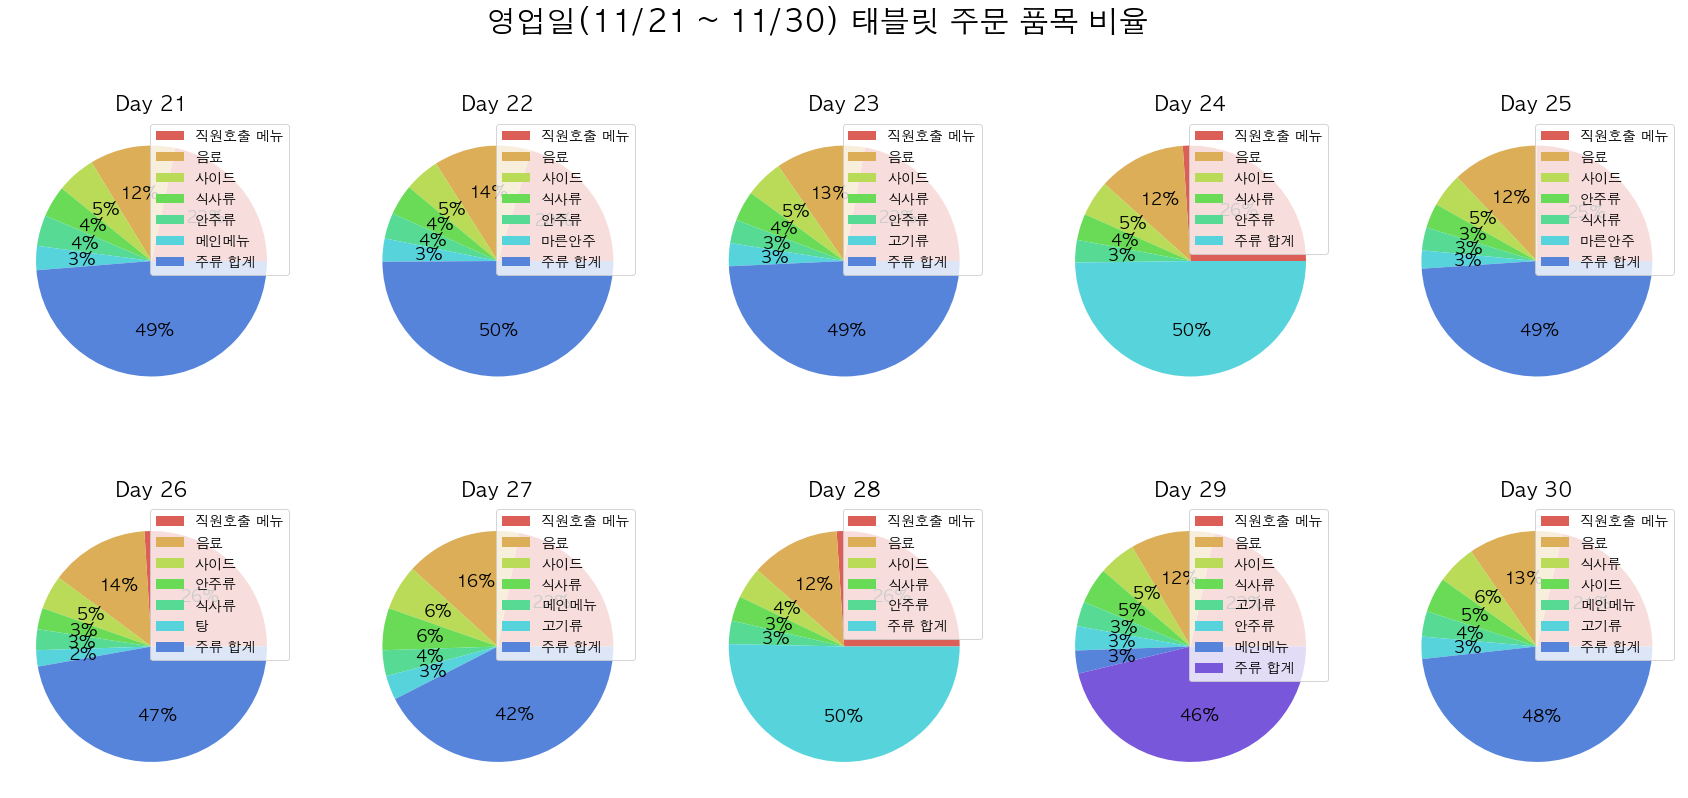

In [46]:
# day 21 ~ day 30 일별 주문 항목 비율

fig, ax = plt.subplots(2, 5, figsize = (30, 13))

ax[0,0].pie(cat21.good_category.values, autopct = '%1.0f%%')
ax[0,0].legend(cat21.index, fontsize = 14, loc = 1)
ax[0,0].set_title('Day 21')

ax[0,1].pie(cat22.good_category.values, autopct = '%1.0f%%')
ax[0,1].legend(cat22.index, fontsize = 14, loc = 1)
ax[0,1].set_title('Day 22')

ax[0,2].pie(cat23.good_category.values, autopct = '%1.0f%%')
ax[0,2].legend(cat23.index,fontsize = 14, loc = 1)
ax[0,2].set_title('Day 23')

ax[0,3].pie(cat24.good_category.values, autopct = '%1.0f%%')
ax[0,3].legend(cat24.index, fontsize = 14, loc = 1)
ax[0,3].set_title('Day 24')

ax[0,4].pie(cat25.good_category.values, autopct = '%1.0f%%')
ax[0,4].legend(cat25.index, fontsize = 14, loc = 1)
ax[0,4].set_title('Day 25')

ax[1,0].pie(cat26.good_category.values, autopct = '%1.0f%%')
ax[1,0].legend(cat26.index, fontsize = 14, loc = 1)
ax[1,0].set_title('Day 26')

ax[1,1].pie(cat27.good_category.values, autopct = '%1.0f%%')
ax[1,1].legend(cat27.index, fontsize = 14, loc = 1)
ax[1,1].set_title('Day 27')

ax[1,2].pie(cat28.good_category.values, autopct = '%1.0f%%')
ax[1,2].legend(cat28.index, fontsize = 14, loc = 1)
ax[1,2].set_title('Day 28')

ax[1,3].pie(cat29.good_category.values, autopct = '%1.0f%%')
ax[1,3].legend(cat29.index, fontsize = 14, loc = 1)
ax[1,3].set_title('Day 29')

ax[1,4].pie(cat30.good_category.values, autopct = '%1.0f%%')
ax[1,4].legend(cat30.index, fontsize = 14, loc = 1)
ax[1,4].set_title('Day 30')

plt.suptitle('영업일(11/21 ~ 11/30) 태블릿 주문 품목 비율', fontsize = 30)
plt.show()

</br>

###### 11월 총 30일 동안 주문 서비스 항목 비율을 일별로 확인했을 때, 모든 영업일에서 '주류' 항목이 전체 품목의 대략 절반 정도의 비중을 차지하는 것을 확인할 수 있습니다.
